In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('./data/Argentina_GDP.csv')
data

,DATE,GDP
0,1962,2.445060e+10
1,1963,1.827212e+10
2,1964,2.560525e+10
3,1965,2.834471e+10
4,1966,2.863047e+10
5,1967,2.425667e+10
6,1968,2.643686e+10
7,1969,3.125628e+10
8,1970,3.158421e+10
9,1971,3.329320e+10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    59 non-null     int64  
 1   GDP     59 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.0 KB


In [5]:
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y')
data

,DATE,GDP
0,1962-01-01,2.445060e+10
1,1963-01-01,1.827212e+10
2,1964-01-01,2.560525e+10
3,1965-01-01,2.834471e+10
4,1966-01-01,2.863047e+10
5,1967-01-01,2.425667e+10
6,1968-01-01,2.643686e+10
7,1969-01-01,3.125628e+10
8,1970-01-01,3.158421e+10
9,1971-01-01,3.329320e+10


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    59 non-null     datetime64[ns]
 1   GDP     59 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.0 KB


In [7]:
data.index = data['DATE']
data.set_index('DATE', inplace=True)
data

,GDP
DATE,
1962-01-01,2.445060e+10
1963-01-01,1.827212e+10
1964-01-01,2.560525e+10
1965-01-01,2.834471e+10
1966-01-01,2.863047e+10
1967-01-01,2.425667e+10
1968-01-01,2.643686e+10
1969-01-01,3.125628e+10
1970-01-01,3.158421e+10


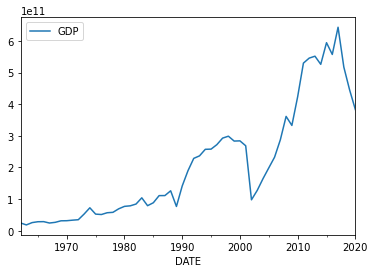

In [9]:
data.plot()
#plt.show()
plt.savefig('./GDP.png')

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

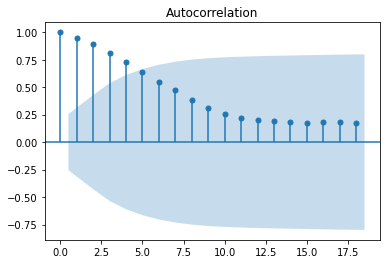

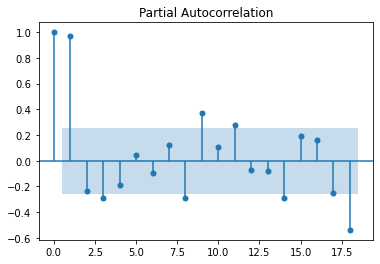

In [13]:
plot_acf(data)
plt.savefig('./GDP_diff0_acf.png')

plot_pacf(data)
plt.savefig('./GDP_diff0_pacf.png')
#plt.show()

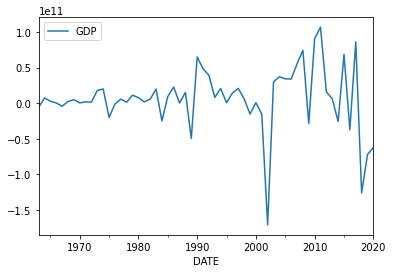

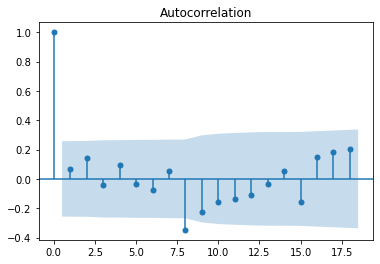

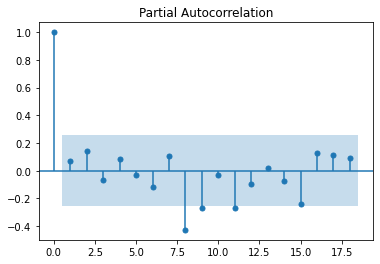

In [15]:
# 1차 차분
data_1 = data.diff(periods=1).iloc[1:]
data_1.plot()
plt.savefig('./GDP_diff1.png')

plot_acf(data_1)
plt.savefig('./GDP_diff1_acf.png')
plot_pacf(data_1)
plt.savefig('./GDP_diff1_pacf.png')
#plt.show()

AR=0, 차분=1, MR=0

In [65]:
model = ARIMA(data, order=(2, 1, 2))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.GDP   No. Observations:                   58
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1501.055
Method:                       css-mle   S.D. of innovations    40642943526.818
Date:                Thu, 09 Dec 2021   AIC                           3014.109
Time:                        08:15:31   BIC                           3026.472
Sample:                    01-01-1963   HQIC                          3018.925
                         - 01-01-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.183e+09   6.35e+09      0.974      0.330   -6.26e+09    1.86e+10
ar.L1.D.GDP    -1.0734      0.124     -8.678      0.000      -1.316      -0.831
ar.L2.D.GDP    -0.6647      0.114     -5.852    

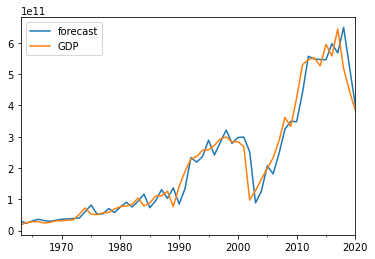

In [66]:
model_fit.plot_predict()
plt.savefig('./GDP_diff1_pred.png')

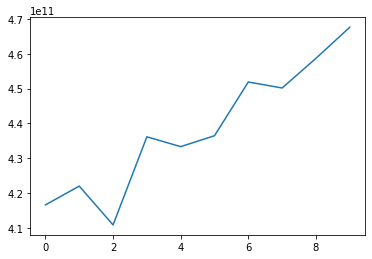

In [67]:
forecast = model_fit.forecast(steps=10)
pred_y = forecast[0].tolist()

plt.plot(pred_y)
plt.savefig('./GDP_10y_prd.png')

In [68]:
pred_y

[416597439032.4396,
 421992454116.21924,
 410843635858.5455,
 436154543908.3366,
 433326110134.73065,
 436467862048.20807,
 451905331273.6019,
 450176178316.73834,
 458700802718.3613,
 467629592535.99347]

결론: 아르헨티나 GDP는 2021, 2022년에는 전년 대비 상승, 2023년에는 소폭 하락할 것이나, 이후 지속적인 상승세를 보일 것이다

- 2021년 하반기 GDP 예측: 425,000,000,000 USD
- 2022년 GDP 예측: 437,000,000,000 USD
- 2023년 GDP 예측: 443,000,000,000 USD

- ARIMA에서의 2021 GDP 예측: 416597439032.4396 USD
- ARIMA에서의 2022 GDP 예측: 421992454116.21924 USD
- ARIMA에서의 2023 GDP 예측: 410843635858.5455 USD

비교: Trading Economics에서는 아르헨티나 GDP의 하락 없는 지속적 상승을 예측하였으나, ARIMA는 2023년 후 소폭 하락 이후 상승을 예측하였다. ARIMA의 경우 2017~2020 사이 지속적 GDP 하락 모형을 보여주어 이후 몇년간 GDP하락을 예측하였으나, 전체적 모형의 상승세에 따라 장기적으로는 GDP가 상승할 것으로 예측한 것으로 보인다.

In [62]:
416597439032.4396 / 383067000000

1.0875315259013165

ARIMA는 2021년의 GDP증가율은 약 8.8%라고 예측하였다. 이는 Argentina Central Bank에서의 조사에서 발표한 7.2% 증가와 유사한 수치를 보인다.